In [1]:
train_data_dir = 'dogs-vs-cats/train'
test_data_dir = 'dogs-vs-cats/test'

In [2]:
import os
from matplotlib import pyplot
from matplotlib.image import imread

for i in range(9):
    pyplot.subplot(330 + 1 + i)
    filename = os.path.join(train_data_dir, 'dog.' + str(i) + '.jpg')
    image = imread(filename)
    pyplot.imshow(image)
    
pyplot.show()

<Figure size 640x480 with 9 Axes>

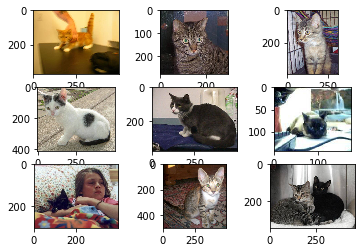

In [6]:
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    filename = os.path.join(train_data_dir, 'cat.' + str(i) + '.jpg')
    image = imread(filename)
    pyplot.imshow(image)
    
pyplot.show()

# Standarized
- Smaller inputs mean a model that is fater to train.

In [5]:
# # Resize all of images
# from os import listdir
# from numpy import asarray
# from numpy import save
# from keras.preprocessing.image import load_img
# from keras.preprocessing.image import img_to_array

# photos, labels = list(), list()

# for file in listdir(train_data_dir):
#     output = 0.0
#     if file.startswith('cat'):
#         output = 1.0

#     photo = load_img(os.path.join(train_data_dir, file), target_size=(200, 200))
#     photo = img_to_array(photo)
#     photos.append(photo)
#     labels.append(output)

# photos = asarray(photos)
# labels = asarray(labels)
# print(photos.shape, labels.shape)

# save('dogs_vs_cats_photos.npy', photos)
# save('dogs_vs_cats_labels.npy', labels)

In [7]:
# 리사이징된 이미지 로드
from numpy import load
photos = load('dogs_vs_cats_photos.npy')
labels = load('dogs_vs_cats_labels.npy')
print(photos.shape, labels.shape)

(25000, 200, 200, 3) (25000,)


In [19]:
'''
dataset_dogs_vs_cats
├── test
│   ├── cats
│   └── dogs
└── train
    ├── cats
    └── dogs
'''
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random

dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
    labeldirs = ['dogs/', 'cats/']
    for labeldir in labeldirs:
        newdir = dataset_home + subdir + labeldir
        makedirs(newdir, exist_ok=True)

def list_files(path):
    for root, dirs, files in os.walk(path):
        level = root.replace(path, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
#         subindent = ' ' * 4 * (level + 1)
#         for file in files:
#             print('{}{}'.format(subindent, file))

list_files('dataset_dogs_vs_cats')

dataset_dogs_vs_cats/
    test/
        dogs/
        cats/
    train/
        dogs/
        cats/


In [20]:
'''
Randomly decide to hold back 25% of the images into the test dataset.
'''
seed(1)
val_ratio = 0.25
src_directory = 'dogs-vs-cats/train/'
for file in listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    if file.startswith('cat'):
        dst = dataset_home + dst_dir + 'cats/' + file
        copyfile(src, dst)
    elif file.startswith('dog'):
        dst = dataset_home + dst_dir + 'dogs/' + file
        copyfile(src, dst)

# Stacking convolutional layers
- Padding: ensure the height and width shapes of the output feature map matches the inputs.
- ImageDataGenerator: scale the pixel values to the range of 0~1.

In [2]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))

    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [3]:
'''
Two Block VGG Model
- Small improvements in performance from about 72% to about 76% accuracy.
'''
def define_model2():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))

    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [4]:
'''
Three Block VGG Model
- Performance from about 76% with two blocks to about 80% accuracy with three blocks.
'''
def define_model3():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))

    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Dropout Regularization

In [5]:
from keras.layers import Dropout

'''
Dropout
- Performance from about 80% accuracy for the baseline model to about 81% with the addition of dropout.
'''
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Image Data Augmentation
- Artifically expand the size of a training dataset by creating modified versions of images in the dataset.
- should not be sued for the test dataset.

In [6]:
'''
- augmented with random horizontal and vertical shifts and random horizontal flips.
- Performance: about 80% -> 85%
'''
def run_test_harness():
    model = define_model()
    # create data generators
    train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = train_datagen.flow_from_directory('dataset_dogs_vs_cats/train/', class_mode='binary', batch_size=64, target_size=(200, 200))
    test_it = test_datagen.flow_from_directory('dataset_dogs_vs_cats/test/', class_mode='binary', batch_size=64, target_size=(200, 200))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

# Explore Transfer Learning
- We can hold the weights of all of the convolutional layers fixed during tarining,
- and only train new fully connected layers that will learn to interpret the features extracted from the model
- and make a binary classification.

In [13]:
from keras.applications.vgg16 import VGG16
from keras.models import Model

def define_model():
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False

    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()

def run_test_harness():
    model = define_model()
    # create data generators
    train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = train_datagen.flow_from_directory('dataset_dogs_vs_cats/train/', class_mode='binary', batch_size=64, target_size=(224, 224))
    test_it = test_datagen.flow_from_directory('dataset_dogs_vs_cats/test/', class_mode='binary', batch_size=64, target_size=(224, 224))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    

# entry point, run the test harness
run_test_harness()

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.
Epoch 1/10
  7/293 [..............................] - ETA: 1:44:25 - loss: 0.7597 - accuracy: 0.5201

KeyboardInterrupt: 

In [12]:
'''
finalize_dogs_vs_cats
├── cats
└── dogs
'''
from os import makedirs
from os import listdir
from shutil import copyfile

dataset_home = 'finalize_dogs_vs_cats/'
labeldirs = ['dogs/', 'cats/']
for labeldir in labeldirs:
    newdir = dataset_home + labeldir
    makedirs(newdir, exist_ok=True)

src_directory = 'dogs-vs-cats/train/'
for file in listdir(src_directory):
    src = src_directory + '/' + file
    if file.startswith('cat'):
        dst = dataset_home + 'cats/' + file
        copyfile(src, dst)
    elif file.startswith('dog'):
        dst = dataset_home + 'dogs/' + file
        copyfile(src, dst)

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    for layer in model.layers:
        layer.trainable = False
        
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def run_test_harness():
    model = define_model()
    datagen = ImageDataGenerator(featurewise_center=True)
    datagen.mean = [123.68, 116.779, 103.939]
    train_it = datagen.flow_from_directory('finalize_dogs_vs_cats/', class_mode='binary', batch_size=64, target_size=(224, 224))
    model.fit_generator(train_it, steps_per_epoch=len(train_it), epochs=10, verbose=0)
    model.save('final_model.h5')

# entry point, run the test harness
run_test_harness()

Found 25000 images belonging to 2 classes.
